# Raw implementation of Perceptron Algorithm

In [39]:
## This is the Class for training the Perceptron algorithm for various data sets

import numpy as np
class Perceptron(object):
    """
    Perceptron Classifier.
    
    Parameters
    -----------
    eta : float
        Learning Rate between 0.01 to 1.0
    n_iter : int
        number of iterations
    
    attributes 
    ----------
    
    w_ : Id_array
        weights after fitting
    error: list
        Number of misclassifications in each epoch
    
    """
    def __init__(self, eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        Fit Training Data.
        
        Parameters
        -----------
        X : {array-like} , shape = [n_samples, n_features]
            Training Vectors , where n_samples are the 
            number of samples and the n_features are the
            number of features for each sample.
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        -------
        self : Object
        
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.erros_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                # this update is a step function
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.erros_.append(errors)
        return self
    
    def net_input(self, X):
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) +self.w_[0]
    
    def predict(self, X):
        """ Return class label after init step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)                

In [25]:
import pandas as pd
df = pd.read_csv("/Users/tkmacl9/Desktop/FastAIDLCourse/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


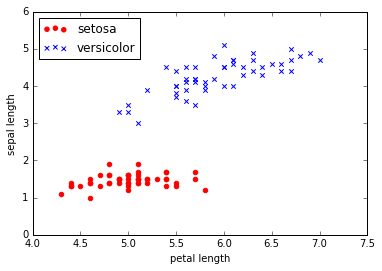

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y = df.iloc[0:100, 4].values
y = np.where(y=='setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='blue', marker='x', label ='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

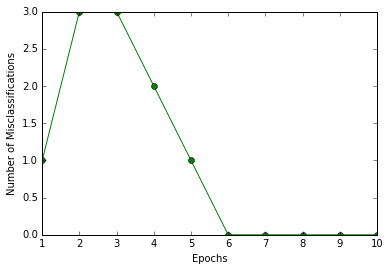

In [38]:
# now train the iris classifier on the perceptron dataset
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
abc = ppn.erros_
plt.plot(range(1,len(abc)+1), abc, color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

In [48]:
## This is the Class for training the Perceptron algorithm - with a Cost Function and differentiating

import numpy as np
class AdaLineGD(object):
    """
    Adaptive Linear Neuron Classifier.
    
    Parameters
    -----------
    eta : float
        Learning Rate between 0.01 to 1.0
    n_iter : int
        number of iterations
    
    attributes 
    ----------
    
    w_ : Id_array
        weights after fitting
    errors: list
        Number of misclassifications in each epoch
    
    """
    def __init__(self, eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        Fit Training Data.
        
        Parameters
        -----------
        X : {array-like} , shape = [n_samples, n_features]
            Training Vectors , where n_samples are the 
            number of samples and the n_features are the
            number of features for each sample.
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        -------
        self : Object
        
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors **2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) +self.w_[0]
    
    def predict(self, X):
        """ Return class label after init step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)                

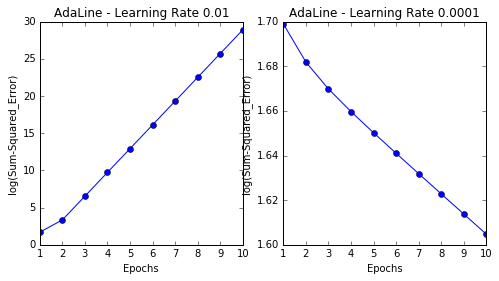

In [52]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada_1 = AdaLineGD(n_iter=10, eta=0.01).fit(X,y)
abc = ada_1.cost_
ax[0].plot(range(1,len(abc)+1), np.log10(abc), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared_Error)')
ax[0].set_title('AdaLine - Learning Rate 0.01')

ada_2 = AdaLineGD(n_iter=10, eta=0.0001).fit(X,y)
cde = ada_2.cost_
ax[1].plot(range(1,len(cde)+1), np.log10(cde), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-Squared_Error)')
ax[1].set_title('AdaLine - Learning Rate 0.0001')
plt.show()



In [53]:
## Standardadization of the feature values 
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/ X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/ X[:,1].std()

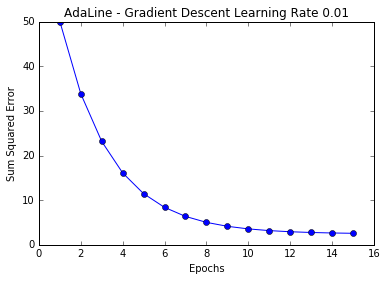

In [59]:
ada_3 = AdaLineGD(n_iter=15, eta=0.01).fit(X_std,y)  ## check on the standardized columns 
abc = ada_3.cost_
plt.title('AdaLine - Gradient Descent Learning Rate 0.01')
plt.plot(range(1,len(abc)+1), abc, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Error')
plt.show()

In [ ]:
## SGD Implementation code goes here. Also plot the error rates in each iteration.


# SKLearn Usage Code Base started

In [65]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# create the Training and test Dataset using the cross validation method in sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# print X_train.shape
# print X_test.shape
# print y_train.shape
# print y_test.shape

# Scaling the features / atributes using the Standard Scalar method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Perceptron Class to train/fit and predict the results
from sklearn.linear_model import Perceptron
pp = Perceptron(n_iter=40, eta0=0.1, random_state=0)
pp.fit(X_train_std, y_train)

# prediction part and Misclassification error
y_pred = pp.predict(X_test_std)
print("Misclassified Samples %d" % (y_test!=y_pred).sum())  # Rudimentary way to find the misclassified samples

from sklearn.metrics import accuracy_score
print("Accuracy %.2f" % accuracy_score(y_test, y_pred))  # Rudimentary way to find the misclassified samples


Misclassified Samples 4
Accuracy 0.91


In [63]:
# This is a generic code to create the decision boundary and the plots for the various categories
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() -1 , X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1 , X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot all samples
    X_test, y_test = X[test_idx, :] , y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0] , y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

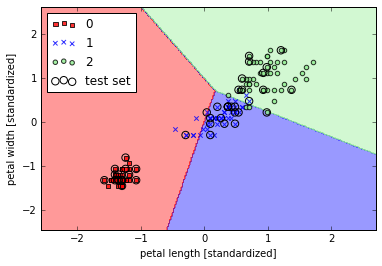

In [72]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y = y_combined, classifier=pp, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic Regression - Using Sklearn
    

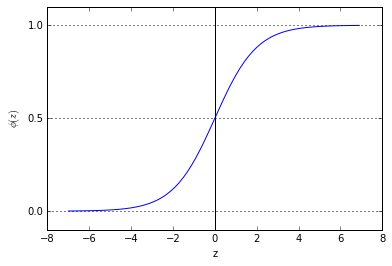

In [90]:
## Plot the graph for the sigmoid function
import numpy as np
def sigmoid(z):
    return (1.0/ (1.0 + np.exp(-z)))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls ='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()